In [51]:
import sys
import os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
%run two_layer_net.ipynb
# from two_layer_net import TwoLayerNet

In [57]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 12000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = train_size / batch_size

In [58]:
def plot_graph():
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_acc_list))
    plt.plot(x, train_acc_list, label='train acc')
    plt.plot(x, test_acc_list, label='test acc', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()

In [59]:
def main():
    for i in range(iters_num + 1):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        # grad = network.numerical_gradient(x_batch, t_batch)
        grad = network.gradient(x_batch, t_batch)

        for layer in ('W1', 'b1', 'W2', 'b2'):
            network.params[layer] -= learning_rate * grad[layer]

        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            test_acc = network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print("epoch: {:>5} | train acc: {:.5f}, test acc: {:.5f}".format(i, train_acc, test_acc))

    plot_graph()

epoch:     0 | train acc: 0.09752, test acc: 0.09740
epoch:   600 | train acc: 0.78197, test acc: 0.78690
epoch:  1200 | train acc: 0.87380, test acc: 0.87770
epoch:  1800 | train acc: 0.89442, test acc: 0.89650
epoch:  2400 | train acc: 0.90590, test acc: 0.90700
epoch:  3000 | train acc: 0.91355, test acc: 0.91240
epoch:  3600 | train acc: 0.91822, test acc: 0.91870
epoch:  4200 | train acc: 0.92243, test acc: 0.92410
epoch:  4800 | train acc: 0.92632, test acc: 0.92670
epoch:  5400 | train acc: 0.92967, test acc: 0.93080
epoch:  6000 | train acc: 0.93255, test acc: 0.93310
epoch:  6600 | train acc: 0.93588, test acc: 0.93720
epoch:  7200 | train acc: 0.93843, test acc: 0.93940
epoch:  7800 | train acc: 0.94093, test acc: 0.94140
epoch:  8400 | train acc: 0.94215, test acc: 0.94170
epoch:  9000 | train acc: 0.94528, test acc: 0.94350
epoch:  9600 | train acc: 0.94720, test acc: 0.94500
epoch: 10200 | train acc: 0.94840, test acc: 0.94650
epoch: 10800 | train acc: 0.95022, test acc: 0

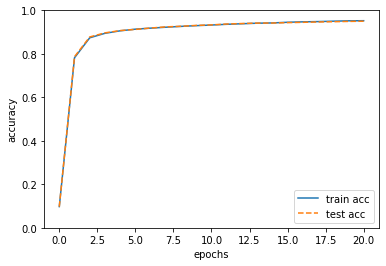

In [60]:
if __name__ == '__main__':
    main()